<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
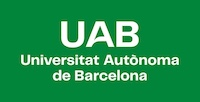
</div>
</div>
<div style="float: right; width: 50%;">
    <p style="margin: 0; padding-top: 22px; text-align:right;"><b>104338 - Programació Avançada</b></p>
    <p style="margin: 0; text-align:right;">Grau en Enginyeria de Dades</p>
    <p style="margin: 0; text-align:right;">Universitat Autònoma de Barcelona (UAB)</p>
</div>
<div style="width: 100%; clear: both;"></div>
<div style="width:100%;">&nbsp;</div>

# Preprocessament de dades en Python

## Instruccions d'ús

A continuació es presentaran explicacions i exemples de preprocessament
de dades en Python. Recordeu que podeu anar executant els exemples per
obtenir-ne els resultats.

## Introducció
 
En aquest mòdul treballarem amb la llibreria
[pandas](http://pandas.pydata.org/), que ja hem introduït als mòduls
anteriors, i [scikit-learn](http://scikit-learn.org), una nova llibreria
que presentem en aquest mòdul. Scikit-learn és una llibreria
d'aprenentatge automàtic de Python que ens ofereix eines i
implementacions d'algoritmes per mineria i anàlisi de dades. Al mateix
web de scikit-learn podeu trobar-ne la [documentació
completa](http://scikit-learn.org/stable/documentation.html).

Aquest Notebook conté exemples concrets de tècniques que poden
aplicar-se per preprocessar dades per a cada un dels grups de tècniques
descrits a la introducció del mòdul (a la xwiki associada). És important
destacar que s'han seleccionat únicament algunes tècniques dins de cada
grup per presentar exemples del tipus de transforamcions es realitzen
però, a la pràctica, el conjunt de tècniques que s'apliquen al
preprocessament de dades és molt més extens.

En aquest Notebook veurem com aplicar diferents tècniques de
preprocessament de dades sobre un conjunt de dades meteorològiques de la
ciutat de Pequín. El _dataset_ original pot trobar-se al
[repositori de Machine Learning de l'UC
Irvine](http://archive.ics.uci.edu/ml/datasets/Beijing+PM2.5+Data#),
tot i que per a les activitats utilitzarem una variant modificada del
mateix que ens permetrà practicar un conjunt més ampli de tècniques.
Podeu trobar una petita descripció dels atributs del conjunt de dades
seguint l'enllaç anterior.

## Primers passos

En primer lloc, carreguem el conjunt de dades:

In [3]:
# Importem la llibreria pandas.
import pandas as pd

# Carreguem les dades del fitxer "weather_dataset_edited.csv" en un dataframe.
data = pd.read_csv("../data/weather_dataset_edited.csv")

# Mostrem una descripció bàsica de les dades carregades.
print(type(data))
print(len(data))
data.head(n=5)

<class 'pandas.core.frame.DataFrame'>
43824


,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,jan,1,0,NaN,-21,-11.0,1021.0,Nw,1.79,0,0
1,2,2010,jan,1,1,NaN,-21,-12.0,1020.0,nw,4.92,0,0
2,3,2010,jan,1,2,NaN,-21,-11.0,1019.0,nw,6.71,0,0
3,4,2010,jan,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,jan,1,4,NaN,-20,-12.0,1018.0,nW,12.97,0,0


## Integració de dades

El conjunt de dades ha estat creat amb la col·laboració de diferents
persones. Tot i que totes elles anotaven la mateixa informació, la
veritat és que van utilitzar una nomenclatura diferent per descriure la
direcció del vent. Vegem com podem unificar la nomenclatura usada per
tots ells.

In [5]:
# Visualitzem les diferents abreviatures utilitzades.
set(data["cbwd"])

{'NE', 'NW', 'Nw', 'SE', 'Se', 'nW', nan, 'ne', 'nw', 'sE', 'se'}

In [6]:
# Unifiquem la nomenclatura para fer servir únicament majúscules.
data.loc[data.cbwd == "ne", "cbwd"] = "NE"
data.loc[(data.cbwd == "Nw") | (data.cbwd == "nW") | (data.cbwd == "nw"), "cbwd"] = "NW"
data.loc[(data.cbwd == "Se") | (data.cbwd == "sE") | (data.cbwd == "se"), "cbwd"] = "SE"

Noteu que fem servir l'operador `.loc`, que havíem vist al mòdul 4 (a les
explicacions sobre la llibreria Pandas) per filtrar les files que
compleixen una característica concreta (per exemple, per a la primera
sentència, que tenen el valor _ne_ al camp `cbwd`) i després seleccionem
únicament la columna «cbwd» per poder assignar-li el nou valor (en
aquest cas, _NE_).

In [8]:
# Comprovem que la substitució s'hagi dut a terme correctament.
set(data["cbwd"])

{'NE', 'NW', 'SE', nan}

A més, sabem que normalment la temperatura es mesurava amb un termòmetre
configurat per utilitzar el sistema mètric internacional, per la qual
cosa es troba expressada en graus Celsius. No obstant això, durant l'any
2011 es van estar prenent les mesures amb un altre termòmetre configurat
amb graus Fahrenheit, de manera que les mostres d' aquest any es troben
expressades en graus Fahrenheit. Vegem com podem unificar les mesures de temperatura.

In [10]:
# Importem la llibreria NumPy.
import numpy as np

# Visualitzem la mitjana anual de les temperatures.
grouped = data.groupby("year")
grouped.aggregate({"TEMP": np.mean})

,TEMP
year,
2010,11.632420
2011,54.617534
2012,11.967441
2013,12.399201
2014,13.679566


Fixeu-vos que, efectivament, la mitjana de l'any 2011 és molt més alta
que la de la resta d'anys.

In [12]:
# Definim una funció que converteix graus Fahrenheit en graus Celsius.
def fahrenheit_to_celsius(x):
    return (x-32)*5/9

# Substituïm els valors de les temperatures de l'any 2011 pel resultat d'aplicar la funció
# 'fahrenheit_to_celsius' al valor actual.
data.loc[data.year == 2011, "TEMP"] = data[data.year == 2011]["TEMP"].apply(fahrenheit_to_celsius)

In [13]:
# Comprovem que els canvis realitzats han tingut efecte.
grouped.aggregate({"TEMP": np.mean})

,TEMP
year,
2010,11.632420
2011,12.565297
2012,11.967441
2013,12.399201
2014,13.679566


## Transformació de dades

Els atributs `month` i `cbwd` contenen cadenes de caràcters com valors i
representen variables categòriques, de manera que segons quin tipus
d'algorismes de mineria de dades no podran treballar amb elles. Per
això, les transformarem en un conjunt d'atributs binaris (un atribut per
a cada categoria possible).

In [15]:
# Mostrem el conjunt d'atributs original.
print(list(data))

['No', 'year', 'month', 'day', 'hour', 'pm2.5', 'DEWP', 'TEMP', 'PRES', 'cbwd', 'Iws', 'Is', 'Ir']


In [16]:
# Creem nous atributs binaris per a les categories utilitzades a les columnes "month" i "cbwd".
data_trans = pd.get_dummies(data, columns=["month", "cbwd"], dummy_na=True)

In [17]:
# Mostrem el conjunt d'atributs després de la transformació.
print(list(data_trans))

['No', 'year', 'day', 'hour', 'pm2.5', 'DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir', 'month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sept', 'month_nan', 'cbwd_NE', 'cbwd_NW', 'cbwd_SE', 'cbwd_nan']


Podem veure un exemple de com s'han transformat els valors observant
algunes mostres concretes. Així, per a les mostres entre les posicions
deu i vint i la columna `cbwd`:

In [19]:
# Mostrem el valor de la columna "cbwd" original per a les mostres entre les posicions deu i vint.
print(data.loc[10:20, ["cbwd"]])

# Mostrem els valors de les noves columnes "cbwd_NE", "cbwd_NW", "cbwd_SE", "cbwd_nan"
# Per a les mostres entre les posicions deu i vint.
data_trans.loc[10:20, ["cbwd_NE", "cbwd_NW", "cbwd_SE", "cbwd_nan"]]

   cbwd
10   NW
11   NW
12   NW
13   NW
14   NW
15  NaN
16   NW
17   NW
18   NE
19   NW
20  NaN


,cbwd_NE,cbwd_NW,cbwd_SE,cbwd_nan
10,False,True,False,False
11,False,True,False,False
12,False,True,False,False
13,False,True,False,False
14,False,True,False,False
15,False,False,False,True
16,False,True,False,False
17,False,True,False,False
18,True,False,False,False
19,False,True,False,False


## Neteja de dades

Un dels problemes que es tracten a la neteja de dades és el tractament
de valors perduts. Hi ha múltiples estratègies per tractar amb aquests
valors, des de directament eliminar les mostres que contenen algun valor
perdut fins a substituir els valors perduts per algun altre valor (per
exemple, per atributs numèrics, la mitjana de l'atribut a la resta de
mostres). Vegem un exemple de substitució de valors perduts per la
mitjana de l'atribut.

En primer lloc, identifiquem els atributs que tenen algun valor NaN:

In [21]:
# Definim una funció que ens retorna un valor booleà indicant si algun dels valors
# de la sèrie és NaN.
def any_is_null(x):
    return any(pd.isnull(x))

# Apliquem la funció 'any_is_null' a cada columna del 'dataframe'.
print(data_trans.apply(any_is_null))

No            False
year          False
day           False
hour          False
pm2.5          True
DEWP          False
TEMP          False
PRES          False
Iws           False
Is            False
Ir            False
month_apr     False
month_aug     False
month_dec     False
month_feb     False
month_jan     False
month_jul     False
month_jun     False
month_mar     False
month_may     False
month_nov     False
month_oct     False
month_sept    False
month_nan     False
cbwd_NE       False
cbwd_NW       False
cbwd_SE       False
cbwd_nan      False
dtype: bool


Fixeu-vos que tot i que la columna `cbwd` original contenia valors
perduts, després de la transformació ja no els tenim, ja que aquests es
troben representats amb valors binaris a la columna `cbwd_nan`. Així,
només cal tractar els valors perduts de la columna `pm2.5`.

Procedim a substituir els valors perduts de la columna `pm2.5` per la
mitjana de la columna utilitzant la llibreria Sklearn (tot i que també
podríem utilitzar les funcions d'indexació de pandas per aconseguir el
mateix objectiu).

In [23]:
# Importem Imputer del mòdul de preprocessament de la llibreria Sklearn.
from sklearn.impute import SimpleImputer

# Substituirem els valors perduts per la mitjana de la columna (el paràmetre axis = 0 indica que calcularem 
# la mitjana sobre la columna).
imp = SimpleImputer(strategy='mean')

# Apliquem la transformació a la columna pm2.5.
data_trans["pm2.5"] = imp.fit_transform(data_trans[["pm2.5"]]).ravel()

In [24]:
# Comprovem que s'han eliminat els valors perduts.
print(data_trans.apply(any_is_null))

No            False
year          False
day           False
hour          False
pm2.5         False
DEWP          False
TEMP          False
PRES          False
Iws           False
Is            False
Ir            False
month_apr     False
month_aug     False
month_dec     False
month_feb     False
month_jan     False
month_jul     False
month_jun     False
month_mar     False
month_may     False
month_nov     False
month_oct     False
month_sept    False
month_nan     False
cbwd_NE       False
cbwd_NW       False
cbwd_SE       False
cbwd_nan      False
dtype: bool


## Normalització de dades

Una de les alternatives per normalitzar les dades consisteix a centrar
els valors perquè la mitjana de l'atribut sigui propera a zero i
escalar-los perquè la variància sigui 1. Vegem com realitzar aquest
procés sobre l'atribut que conté la pressió atmosfèrica.

In [26]:
# Observem les estadístiques bàsiques originals de l'atribut "PRES".
data_trans["PRES"].describe()

count    43824.000000
mean      1016.447654
std         10.268698
min        991.000000
25%       1008.000000
50%       1016.000000
75%       1025.000000
max       1046.000000
Name: PRES, dtype: float64

In [27]:
# Importem StandardScaler del mòdul de preprocessament de la llibreria Sklearn.
from sklearn.preprocessing import StandardScaler

# Utilitzem el StandardScaler de Sklearn per normalitzar els valors de l'atribut "PRES".
data_trans.loc[:, ["PRES"]] = StandardScaler().fit_transform(data_trans.loc[:, ["PRES"]])

In [28]:
# Observem els estadístics bàsics de l'atribut "PRES" després de la transformació.
data_trans["PRES"].describe()

count    4.382400e+04
mean     4.851095e-15
std      1.000011e+00
min     -2.478206e+00
25%     -8.226701e-01
50%     -4.359456e-02
75%      8.328654e-01
max      2.877939e+00
Name: PRES, dtype: float64

Fixeu-vos que, efectivament, la mitjana s'aproxima ara al valor 0, i la
desviació, a 1.

## Reducció de dimensions

Una opció senzilla per reduir dimensions consisteix a seleccionar un
conjunt de característiques d'interès. Podem dur a terme aquesta selecció
de manera senzilla gràcies a les funcions que disposem sobre els
_dataframes_ de pandas.

In [30]:
# Mostrem els atributs actuals.
print(list(data_trans))

['No', 'year', 'day', 'hour', 'pm2.5', 'DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir', 'month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sept', 'month_nan', 'cbwd_NE', 'cbwd_NW', 'cbwd_SE', 'cbwd_nan']


In [31]:
# Eliminem l'atribut "DEWP".
data_trans = data_trans.drop("DEWP", axis=1)

In [32]:
# Mostrem els atributs després del canvi.
print(list(data_trans))

['No', 'year', 'day', 'hour', 'pm2.5', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir', 'month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sept', 'month_nan', 'cbwd_NE', 'cbwd_NW', 'cbwd_SE', 'cbwd_nan']


Un grup de tècniques de reducció de dimensions molt desenvolupat se
centra en l'extracció de característiques. Tot i que conceptualment
aquests processos s'escapen d'aquest curs introductori, la veritat és
que és fàcil aplicar aquestes tècniques amb Sklearn. Si hi esteu
interessats podeu consultar [els
exemples](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#examples-using-sklearn-decomposition-pca)
de la pròpia documentació de Sklearn.

## Reducció de mostres

Una alternativa senzilla per fer una reducció de les mostres disponibles
consisteix a seleccionar de manera aleatòria uniforme un subconjunt de
mostres del _dataset_.

In [34]:
# Mostrem el nombre de mostres original.
print(len(data_trans))

43824


In [35]:
# Seleccionem un 25% de les mostres de manera aleatòria.
sampled_data = data_trans.sample(frac=0.25)

In [36]:
# Mostrem el nombre de mostres seleccionat.
print(len(sampled_data))

# Mostrem les cinc primeres mostres seleccionades.
sampled_data.head(n=5)

10956


,No,year,day,hour,pm2.5,TEMP,PRES,Iws,Is,Ir,...,month_mar,month_may,month_nov,month_oct,month_sept,month_nan,cbwd_NE,cbwd_NW,cbwd_SE,cbwd_nan
35574,35575,2014,22,6,107.0,-9.0,0.832865,8.05,0,0,...,False,False,False,False,False,False,False,True,False,False
14216,14217,2011,16,8,16.0,25.0,-1.212208,18.32,0,0,...,False,False,False,False,False,False,False,True,False,False
22380,22381,2012,21,12,293.0,28.0,-1.309592,63.96,0,2,...,False,False,False,False,False,False,False,False,True,False
16415,16416,2011,15,23,206.0,5.0,0.930250,3.56,0,0,...,False,False,True,False,False,False,False,False,False,True
28631,28632,2013,7,23,78.0,9.0,-0.822670,3.13,0,0,...,False,False,False,False,False,False,True,False,False,False


Fixeu-vos que el _dataframe_ conserva el nombre d'atributs original, però
només conté un 25% de les mostres originals.

## Discretització

De vegades ens interessarà convertir un atribut continu en un de
discret. Una manera de fer-ho és divir l'espai de possibles valors que
pren l'atribut a `n` *bins* o intervals de la mateixa mida i assignar
cada mostra a l'interval al qual pertany. Vegem un exemple discretitzant
l'atribut `Iws` en cinc intervals de la mateixa mida.

In [38]:
# Observem les estadístiques bàsiques de l'atribut "Iws".
data_trans["Iws"].describe()

count    43824.000000
mean        23.889140
std         50.010635
min          0.450000
25%          1.790000
50%          5.370000
75%         21.910000
max        585.600000
Name: Iws, dtype: float64

In [39]:
# Creem un nou atribut "Iws_disc" que conté la discretització d'"Iws".
data_trans["Iws_disc"] = pd.cut(data_trans["Iws"], 5)

In [40]:
# Visualitzem el contingut dels atributs "Iws" i "Iws_disc" per a un subconjunt de mostres 
# per observar-ne el resultat.
data_trans.loc[80:90, ["Iws", "Iws_disc"]]

,Iws,Iws_disc
80,80.90,"(-0.135, 117.48]"
81,90.73,"(-0.135, 117.48]"
82,100.56,"(-0.135, 117.48]"
83,108.61,"(-0.135, 117.48]"
84,117.55,"(117.48, 234.51]"
85,127.38,"(117.48, 234.51]"
86,136.32,"(117.48, 234.51]"
87,145.26,"(117.48, 234.51]"
88,152.41,"(117.48, 234.51]"
89,159.56,"(117.48, 234.51]"


Per defecte la funció `cut` utilitza l'interval com a valor del nou
atribut. Podem assignar valors arbitraris al nou atribut, per exemple:

In [42]:
# Designem cinc noms per als intervals
group_names = ['Very Low', 'Low', 'Medium', 'High', 'Very High']

In [43]:
# Creem un nou atribut "Iws_disc_named" discretitzant de nou "Iws" amb cinc intervals
# de la mateixa mida però fent servir ara les etiquetes definides.
data_trans["Iws_disc_named"] = pd.cut(data_trans["Iws"], 5, labels = group_names)

In [44]:
# Visualitzem el contingut dels atributs "Iws", "Iws_disc" i "Iws_disc_named" 
# per a un subconjunt de mostres per observar-ne el resultat.
data_trans.loc[80:90, ["Iws", "Iws_disc", "Iws_disc_named"]]

,Iws,Iws_disc,Iws_disc_named
80,80.90,"(-0.135, 117.48]",Very Low
81,90.73,"(-0.135, 117.48]",Very Low
82,100.56,"(-0.135, 117.48]",Very Low
83,108.61,"(-0.135, 117.48]",Very Low
84,117.55,"(117.48, 234.51]",Low
85,127.38,"(117.48, 234.51]",Low
86,136.32,"(117.48, 234.51]",Low
87,145.26,"(117.48, 234.51]",Low
88,152.41,"(117.48, 234.51]",Low
89,159.56,"(117.48, 234.51]",Low
